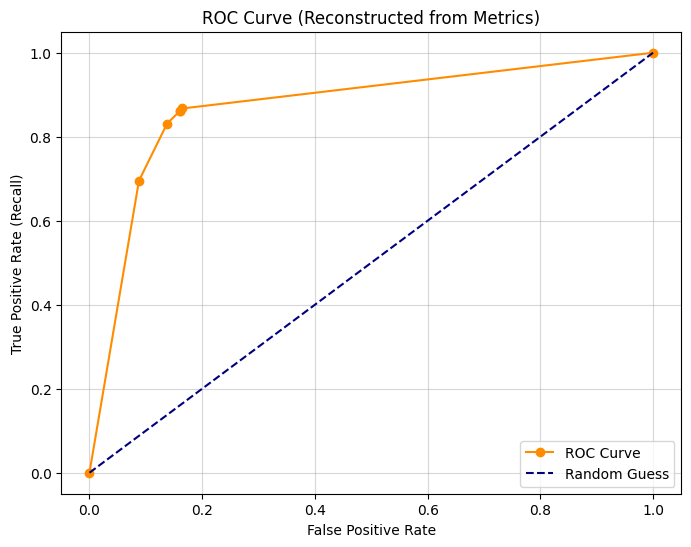

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 데이터 정의
accuracy = [0.845542305508234, 0.8438387279954571, 0.85451, 0.8540601930721181, 0.845542305508234]
recall = [0.860813704496788, 0.867237687366167, 0.69519, 0.8308351177730193, 0.860813704496788]
precision = [0.6600985221674877, 0.6553398058252428, 0.74074, 0.6855123674911661, 0.6600985221674877]

# 2. FPR 역산 (FPR = TPR * r * (1/Precision - 1))
# r (P/N ratio)은 데이터 일관성을 통해 약 0.3609로 추정됨
r_estimated = 0.360896
fpr = [r * r_estimated * (1/p - 1) for r, p in zip(recall, precision)]

# 3. 정렬 및 그래프 그리기
# (0,0)과 (1,1)을 추가하여 ROC 곡선의 전체 형태를 잡아줍니다.
roc_points = sorted(zip(fpr, recall))
fpr_sorted = [0] + [x[0] for x in roc_points] + [1]
tpr_sorted = [0] + [x[1] for x in roc_points] + [1]

plt.figure(figsize=(8, 6))
plt.plot(fpr_sorted, tpr_sorted, marker='o', color='darkorange', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (Reconstructed from Metrics)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.5)
plt.show()

c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:21:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


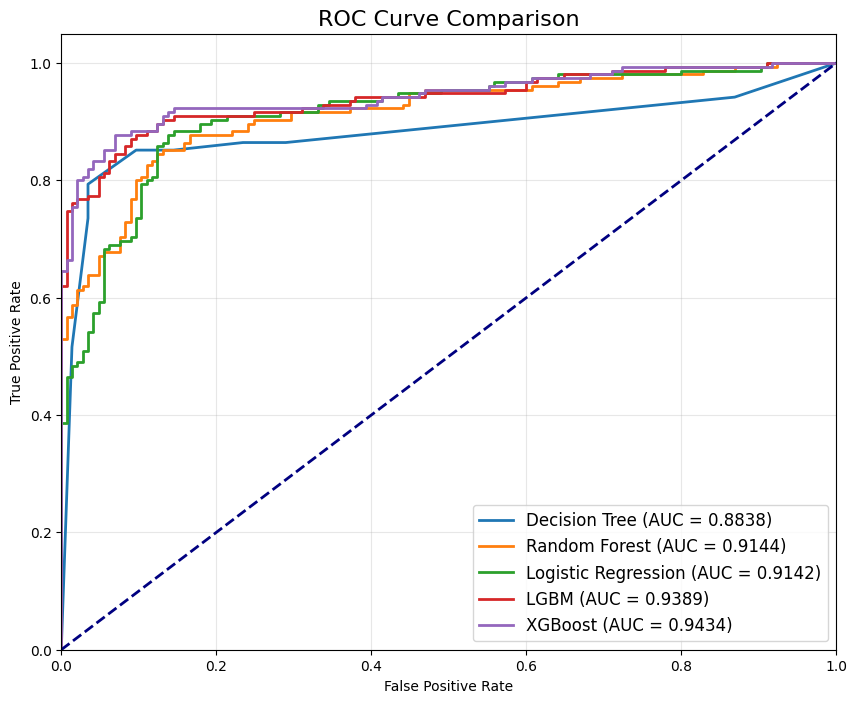

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 모델 라이브러리 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# -------------------------------------------------------
# 1. 데이터 준비 (사용자분의 X_train, y_test 등으로 교체하세요)
# -------------------------------------------------------
# 예시용 가상 데이터 생성
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------------------------------
# 2. 모델 정의 (딕셔너리 활용)
# -------------------------------------------------------
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5,random_state=0),
    "Random Forest": RandomForestClassifier(max_depth=5,random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0),
    "LGBM": LGBMClassifier(random_state=0, verbose=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
}

# -------------------------------------------------------
# 3. 그래프 그리기 (반복문)
# -------------------------------------------------------
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측 확률값 추출 (양성 클래스인 1에 대한 확률)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # ROC Curve 계산
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # 그래프 플롯 (AUC 점수 포함)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

# -------------------------------------------------------
# 4. 그래프 꾸미기
# -------------------------------------------------------
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()